In [263]:
import pandas as pd

In [264]:
df = pd.read_csv('birth.csv', sep=';')

# Преобразование числовых значений
df['Total'] = df['Total'].str.replace(',', '').astype(float)

# Создание сводной таблицы
pivot_df = df.pivot_table(
    index='Autonomous Communities and Cities',
    columns='Demographic Concepts', 
    values='Total',
    aggfunc='first'
).reset_index()

# Переименование и реорганизация столбцов
pivot_df.columns.name = None
df = pivot_df[['Autonomous Communities and Cities', 'Nacimiento', 'Natural growth', 'Late foetal deaths']]

In [265]:
df = df.drop(20)
df = df.drop(19)
df.describe()

,Nacimiento,Natural growth,Late foetal deaths
count,19.000000,19.000000,19.000000
mean,15901.421053,-5978.421053,45.789474
std,19387.437150,6148.255067,45.035269
min,681.000000,-18778.000000,2.000000
25%,2487.500000,-10085.500000,20.500000
50%,8738.000000,-5188.000000,29.000000
75%,14039.500000,-569.000000,47.500000
max,61397.000000,1653.000000,153.000000


<Axes: ylabel='Count'>

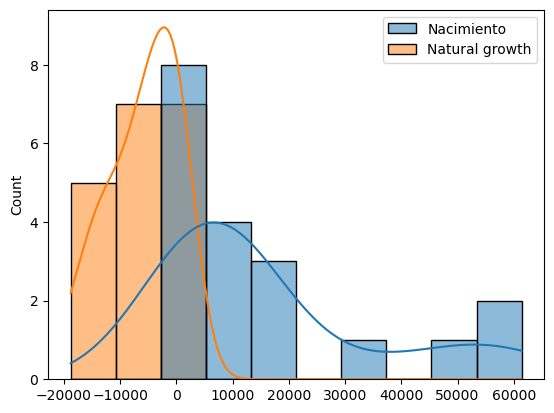

In [266]:
import seaborn as sns

sns.histplot([df['Nacimiento'], df['Natural growth']], bins='auto', kde=True)

<Axes: xlabel='Late foetal deaths', ylabel='Count'>

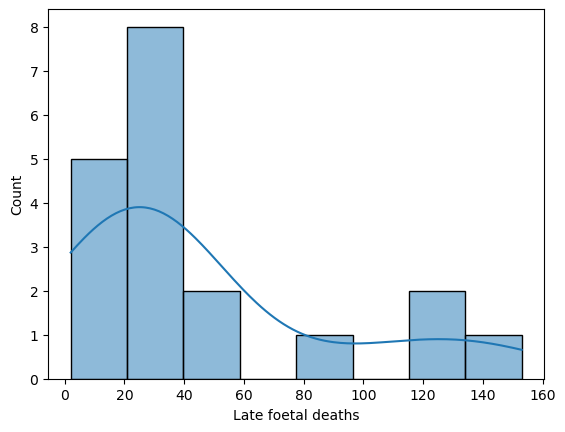

In [267]:
sns.histplot(df['Late foetal deaths'], bins='auto', kde=True)


In [268]:
from scipy.stats import shapiro
stat, p = shapiro(df['Nacimiento'])
print(f'Nacimiento\nstatistic: {stat:.4f}, p_value: {p:.4f}')
stat, p = shapiro(df['Natural growth'])
print(f'Natural Growth\nstatistic: {stat:.4f}, p_value: {p:.4f}')
stat, p = shapiro(df['Late foetal deaths'])
print(f'Late foetal deaths\nstatistic: {stat:.4f}, p_value: {p:.4f}')
stat, p = shapiro(violencia['Víctimas de violencia doméstica'])
print(f'Víctimas de violencia doméstica\nstatistic: {stat:.4f}, p_value: {p:.4f}')

Nacimiento
statistic: 0.7446, p_value: 0.0002
Natural Growth
statistic: 0.9234, p_value: 0.1306
Late foetal deaths
statistic: 0.7983, p_value: 0.0011
Víctimas de violencia doméstica
statistic: 0.8029, p_value: 0.0013


In [269]:
violencia = pd.read_csv('./violencia.csv', sep=';')
violencia = violencia.T
violencia = violencia.reset_index()
violencia = violencia.rename(columns={"index": "Víctimas de violencia de género", 0: "Víctimas de violencia doméstica"})
violencia = violencia.drop(0)
violencia.reset_index(drop=True, inplace=True)
violencia

,Víctimas de violencia de género,Víctimas de violencia doméstica
0,8.020,1.851
1,994,237
2,704,189
3,1.307,415
4,2.441,500
5,681,132
6,1.879,538
7,1.889,394
8,2.768,940
9,4.858,1.106


In [270]:
violencia['Víctimas de violencia de género'] = violencia['Víctimas de violencia de género'].str.replace('.', '').astype(int)

In [271]:
violencia['Víctimas de violencia doméstica'] = violencia['Víctimas de violencia doméstica'].astype(str).str.replace('.', '').astype(int)

In [272]:
violencia['Autonomous Communities and Cities'] = df['Autonomous Communities and Cities']

<Axes: ylabel='Count'>

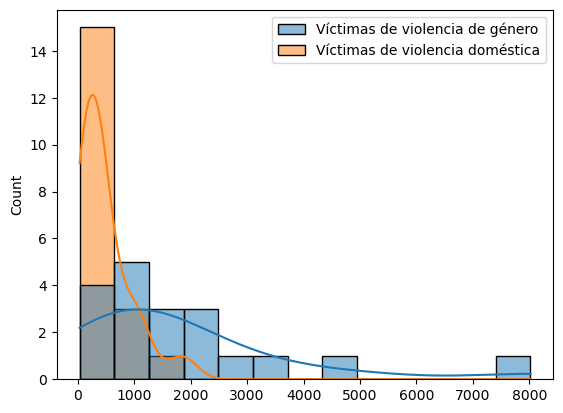

In [273]:
sns.histplot(violencia, bins='auto', kde=True)

In [274]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(violencia['Víctimas de violencia doméstica'], df['Late foetal deaths'])
print(f"Correlation: {corr:.4f}\nP-Value: {p_value:.4f}")

Correlation: 0.8516
P-Value: 0.0000


In [275]:
from scipy.stats import kendalltau

corr, p_value = kendalltau(violencia['Víctimas de violencia doméstica'], df['Late foetal deaths'])
print(f"Correlation: {corr:.4f}\nP-Value: {p_value:.4f}")

Correlation: 0.6647
P-Value: 0.0001


In [276]:
from scipy.stats import mannwhitneyu

low = df[df['Nacimiento'] < 8738]['Late foetal deaths'].values
high = df[df['Nacimiento'] >= 8738]['Late foetal deaths'].values

print(len(low), len(high))

stat, p = mannwhitneyu(low, high, alternative='two-sided')
print(f'U: {stat}, p-value: {p:.4f}')

from scipy.stats import median_test
stat, p, med, contingency = median_test(low, high)
print(f'chi: {stat:.4f}, p-value: {p:.4f}, med: {med}, contingency: {contingency}')

9 10
U: 8.5, p-value: 0.0033
chi: 6.4653, p-value: 0.0110, med: 29.0, contingency: [[1 8]
 [8 2]]


In [277]:
violencia.describe()

,Víctimas de violencia de género,Víctimas de violencia doméstica
count,19.000000,19.000000
mean,1825.473684,466.315789
std,1928.182747,462.515592
min,115.000000,31.000000
25%,692.500000,160.500000
50%,1307.000000,342.000000
75%,2165.000000,519.000000
max,8020.000000,1851.000000


In [284]:
low = df[violencia['Víctimas de violencia doméstica'] < 160.5]['Nacimiento'].values
lower = df[(violencia['Víctimas de violencia doméstica'] >= 160.5) & (violencia['Víctimas de violencia doméstica'] < 342)]['Nacimiento'].values
higher = df[(violencia['Víctimas de violencia doméstica'] >= 342) & (violencia['Víctimas de violencia doméstica'] < 519)]['Nacimiento'].values
high = df[violencia['Víctimas de violencia doméstica'] >= 519]['Nacimiento'].values


from scipy.stats import kruskal
stat, p = kruskal(low, lower, higher, high)
print(f'H: {stat:.4f}, p-value: {p:.4f}')

H: 11.8121, p-value: 0.0081
